download from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-download-auto-examples-classification-plot-classifier-comparison-py


# Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


In [18]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# classifier들 준비

In [19]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# 데이터 준비

In [20]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


In [21]:
print(X.shape)
print(X[:5])
print(y.shape)
print(y[:5])

(100, 2)
[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]
 [-0.30800901  1.59406316]]
(100,)
[1 0 0 1 1]


In [22]:
# datasets는 3가지 형태의 데이터를 포함한다.
#   - 반달형 데이터
#   - 원형 데이터
#   - 선형 분리 데이터
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

# 순차적 실행

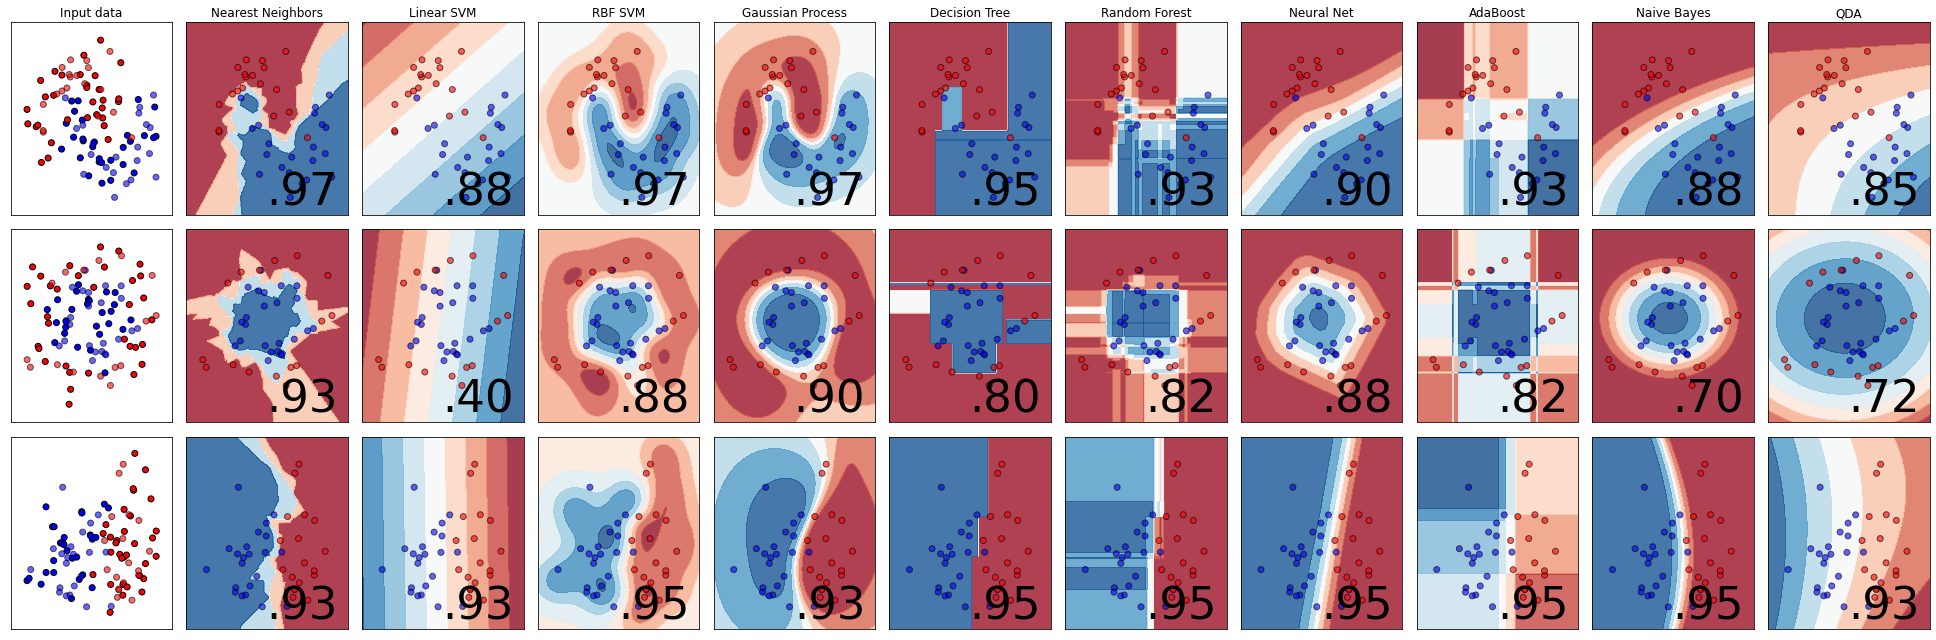

In [24]:

h = .02  # step size in the mesh

figure = plt.figure(figsize=(27, 9))


i = 1 # classifier의 순차 번호

for ds_cnt, ds in enumerate(datasets):

    X, y = ds

    # Standardization 실행
    X = StandardScaler().fit_transform(X)

    # train, test로 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # 가장 좌측에 원본 데이터 그리기
    cm = plt.cm.RdBu # cm : color map
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())


    i += 1

    # 각 classifier별로 실행
    for name, clf in zip(names, classifiers):

        # 그림 그릴 axis. 세로는 데이터 갯수, 가로는 classifier갯수 + 1(순수 데이터)
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # 학습 실행
        clf.fit(X_train, y_train)

        # 결과 점수 구하기
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].

        # 각 (x,y) 좌표에 대한 출력값을 설정
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        # 각 (x,y)에 대한 출력값에 대한 등고선 그리기
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # test 데이터 점 찍기
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)

        # 정확도를 숫자로 표시
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=45, horizontalalignment='right')
        
        i += 1

plt.tight_layout()
plt.show()

# SciKit-Learn의 방법들

- 지도학습 방법 리스트 : https://scikit-learn.org/stable/supervised_learning.html
- 비지도 학습 리스트 : https://scikit-learn.org/stable/unsupervised_learning.html

# 개별적으로 실행

## 데이터 준비

In [ ]:
X, y = make_moons(noise=0.3, random_state=0)

In [33]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60, 2)
(60,)
(40, 2)
(40,)


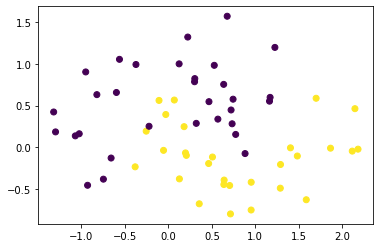

In [36]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

## Nearest Neighbors

In [37]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.95


## Linear SVM

In [39]:
clf = SVC(kernel="linear", C=0.025)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.875


## RBF SVM

In [40]:
clf = SVC(gamma=2, C=1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.975


## Gaussian Process

In [41]:
clf = GaussianProcessClassifier(1.0 * RBF(1.0))
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.95


## Decision Tree

In [42]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.95


## Random Forest

In [43]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.95


## Neural Net

사용된 구조 : https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [44]:
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.875


## AdaBoost

In [45]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.925


## Naive Bayes

In [46]:
clf = GaussianNB()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.875


## QDA

In [47]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.85


## XGBoost

In [55]:
from xgboost import XGBClassifier

clf=XGBClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.925


## GBM

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.95


## light GBM

In [56]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=200)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.775


## LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.875


## KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.95
